# Red Neuronal para la puerta XOR (versión PyTorch)

En este notebook implementaremos una red neuronal simple que aprende el comportamiento de la función lógica **XOR**, utilizando **PyTorch** como framework.

Este ejemplo es clásico en el estudio de redes neuronales porque la puerta XOR **no es linealmente separable**, lo que implica que **una única neurona no puede resolverla**, pero **una red con al menos una capa oculta sí puede**.

Este ejemplo es muy útil para que comprender cómo se entrena una red neuronal desde cero y la importancia de las capas ocultas y funciones de activación.


## 🧠 Entendiendo una red neuronal usando PyTorch.

En PyTorch, una red neuronal es un modelo que se construye como una clase de Python que hereda de la clase ```torch.nn.Module```. Esta clase representa cualquier modelo de machine learning: desde una red neuronal simple hasta una arquitectura compleja como un Transformer.

## 🔧 PASO A PASO: Construcción de una red neuronal en PyTorch

### Paso 1: Importar librerías necesarias

Instalación previa con `pip`:   

`pip install torch torchvision`   

Más info (aquí)[https://pytorch.org/get-started/locally/]

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

- ```torch```: núcleo de PyTorch.

- ```torch.nn```: módulo que contiene clases para construir redes neuronales (capas, activaciones, etc.).

- ```torch.optim```: contiene algoritmos de optimización como SGD, Adam, etc.

- ```torch.nn.functional```: versión funcional (sin clases) de activaciones y operaciones.

###  <img src="./img/NVIDIA_logo.png" height=20> OPCIONAL, para equipos con GPU + LINUX

In [2]:
# Detectar si hay GPU disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Usando dispositivo:", device)

Usando dispositivo: cuda


### Paso 2: Definir los datos de entrada y salida

La tabla de verdad de XOR es la siguiente:

| Entrada A | Entrada B | Salida XOR |
|-----------|-----------|-------------|
|     0     |     0     |      0      |
|     0     |     1     |      1      |
|     1     |     0     |      1      |
|     1     |     1     |      0      |

Vamos a codificar estos valores como **tensores** para entrenar la red neuronal.


In [2]:
# Datos de entrada
X = torch.tensor([[0,0],
                  [0,1],
                  [1,0],
                  [1,1]], dtype=torch.float32)

# Salidas esperadas
y = torch.tensor([[0],
                  [1],
                  [1],
                  [0]], dtype=torch.float32)


###  <img src="./img/NVIDIA_logo.png" height=20> OPCIONAL, para equipos con GPU + LINUX

Si se ha detectado GPU, podemos "mover" los tensores a la GPU:

In [3]:
# Datos de entrada
X = torch.tensor([[0,0],
                  [0,1],
                  [1,0],
                  [1,1]], dtype=torch.float32).to(device)

# Salidas esperadas
y = torch.tensor([[0],
                  [1],
                  [1],
                  [0]], dtype=torch.float32).to(device)


### Paso 3: Definir la red neuronal

La red tendrá:
- 2 neuronas de entrada (una por bit)
- 1 capa oculta con 2 neuronas y función de activación ReLU o Sigmoid
- 1 neurona de salida con activación Sigmoid para devolver probabilidad (entre 0 y 1)

Este tipo de red puede aprender la función XOR si se entrena correctamente.


In [4]:
class XORNet(nn.Module):
    def __init__(self):
        super(XORNet, self).__init__()
        self.fc1 = nn.Linear(2, 2)  # Capa oculta
        self.fc2 = nn.Linear(2, 1)  # Salida

    def forward(self, x): # Definimos la función de forward, que es la que se ejecuta al hacer una predicción.
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x



🔍 Explicación detallada:
| Parte	| Qué hace |
|-------|----------|
| ```class XORNet(nn.Module)```	| Define la clase que representa la red |
| ```__init__()```	| Aquí definimos la estructura de la red (capas) |
| ```self.fc1 = nn.Linear(2, 2)```	| Capa totalmente conectada ("fully connected") con 2 entradas y 2 salidas |
| ```self.fc2 = nn.Linear(2, 1)```	| Capa final con 1 salida (para predecir 0 o 1) |
| ```forward()```	| Método que describe cómo fluye la información en la red |
| ```torch.sigmoid(...)```	| Función de activación: convierte la salida en un valor entre 0 y 1 (probabilidad) |   


🔁 PyTorch separa la definición del modelo (```__init__```) del flujo de datos (```forward```). Esto da mucha flexibilidad para hacer modelos dinámicos o condicionales.

### Paso 4: Crear una instancia de la red.

In [4]:
# Instanciamos la red
modelo = XORNet()

###  <img src="./img/NVIDIA_logo.png" height=20> OPCIONAL, para equipos con GPU + LINUX

Si se ha detectado GPU, podemos "mover" también el modelo a la GPU:

In [5]:
# Instanciamos la red
modelo = XORNet().to(device)

En este paso se crea un objeto de la clase ```XORNet```, que ya contiene las capas y la lógica propia de forward.

### Paso 5: Definir función de pérdida y el optimizador a usar.  (Hiperparámetros) 

Usaremos:
- `BCELoss`: función de pérdida binaria (Binary Cross Entropy). Mide la diferencia entre la salida (probabilidad) y el valor real (0 o 1)
- `SGD`: optimizador con tasa de aprendizaje moderada. Realiza el ajuste de los pesos poco a poco, en función del gradiente.
- `modelo.parameters()`: le dice al optimizador que parámetros debe ajustar (pesos de la red)

In [6]:
# Hiperparámetros
criterion = nn.BCELoss()
optimizer = optim.SGD(modelo.parameters(), lr=0.1)

### Paso 6: Entrenar la red neuronal

Entrenaremos durante varias épocas hasta que la red aprenda a predecir correctamente los valores XOR.


In [7]:
# Entrenamiento
for epoch in range(10000):
    modelo.train() # Modo entrenamiento

    # Forward
    output = modelo(X)
    
    # Cálculo de la pérdida
    loss = criterion(output, y)

    # Backward
    optimizer.zero_grad()
    loss.backward()
    
    # Actualización de pesos
    optimizer.step()

    # Imprimir pérdida cada 1000 épocas
    if (epoch+1) % 1000 == 0:
        print(f"Época {epoch+1}, Pérdida: {loss.item():.4f}")


Época 1000, Pérdida: 0.6933
Época 2000, Pérdida: 0.6932
Época 3000, Pérdida: 0.6932
Época 4000, Pérdida: 0.6931
Época 5000, Pérdida: 0.6931
Época 6000, Pérdida: 0.6931
Época 7000, Pérdida: 0.6930
Época 8000, Pérdida: 0.6930
Época 9000, Pérdida: 0.6928
Época 10000, Pérdida: 0.6925


#### 🌀 Ciclo de entrenamiento. 


| Paso	| Descripción |
|-------|-------------|
| `.train()` | Activa el modo entrenamiento (algunas capas como dropout o batchnorm cambian de comportamiento)
| `output = modelo(X)`| Hace una predicción con los datos de entrada
| `loss = criterion(...)` | Calcula el error entre lo predicho y lo real
| `optimizer.zero_grad()` | Limpia los gradientes anteriores
| `loss.backward()`	| Calcula los nuevos gradientes (derivadas)
| `optimizer.step()`	| Ajusta los pesos de la red según los gradientes

### Paso 7: Evaluación del modelo

Comprobamos si la red ha aprendido correctamente la función XOR.   

Si el entrenamiento fue exitoso, debería acertar las 4 combinaciones.


In [8]:
modelo.eval() # Modo evaluación
with torch.no_grad(): # Desactivamos el cálculo de gradientes, ya que no es necesario para la evaluación
    pred = modelo(X) # Hacemos predicciones
    pred_class = (pred > 0.5).float() # Convertimos las probabilidades a clases (0 o 1). Si predicción > 0.5, clase 1, sino clase 0.
    print("Predicciones:")
    for i in range(4): # Iteramos sobre las 4 entradas
        # Imprimimos la entrada, salida esperada y clase predicha.
        print(f"Entrada: {X[i].tolist()}, Salida esperada: {int(y[i].item())}, Predicho: {int(pred_class[i].item())}")


Predicciones:
Entrada: [0.0, 0.0], Salida esperada: 0, Predicho: 1
Entrada: [0.0, 1.0], Salida esperada: 1, Predicho: 1
Entrada: [1.0, 0.0], Salida esperada: 1, Predicho: 0
Entrada: [1.0, 1.0], Salida esperada: 0, Predicho: 0


## Comparativa PyTorch vs Keras (caso XOR)

| Aspecto                      | PyTorch                                   | Keras                                         |
|-----------------------------|-------------------------------------------|-----------------------------------------------|
| Definición de red           | Clase con `nn.Module`                     | Uso de `Sequential`                           |
| Control del entrenamiento   | Manual (`loop`, `backward()`)             | Automático (`fit`)                            |
| Visualización de gradientes | Muy accesible                             | Oculta por defecto                            |
| Ideal para                  | Aprender, investigar                      | Prototipado rápido, producción empresarial    |

**Conclusión:** PyTorch, aunque más detallado, permite aprender y visualizar cómo funciona internamente una red neuronal. Este ejemplo de XOR lo demuestra claramente.


### 🧪 Sugerencias para Experimentar

- Cambiar la función de activación a `ReLU` y observar el resultado.

- Usar más neuronas en la capa oculta.

- Cambiar el optimizador a `Adam`.

## 	&#x1F4C8; Visualización de la evolución de los pesos.    

🎯 Objetivo

Mostrar cómo los pesos de cada neurona se modifican en cada época para reducir el error. Esto refuerza los conceptos de:

- Propagación hacia adelante (forward)
- Retropropagación (backward)
- Ajuste de pesos con optimizador

📊 Estrategia de visualización

1. Almacenar los valores de los pesos en cada época.
2. Graficar la evolución de cada peso en el tiempo.
3. Añadir etiquetas o colores por capa para diferenciar.

🧠 ¿Qué son los pesos? (Refresco conceptual)

Los **pesos** son los *parámetros internos que multiplican las entradas antes de pasar a la siguiente capa*. El entrenamiento ajusta esos pesos para mejorar la precisión del modelo.   

En el caso de queramos visualizar estos hiperparámetros, podemos hacerlo de la manera siguiente:   

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Definir la red XOR
class XORNet(nn.Module):
    def __init__(self):
        super(XORNet, self).__init__()
        self.fc1 = nn.Linear(2, 2)  # Capa oculta
        self.fc2 = nn.Linear(2, 1)  # Capa de salida

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

# Datos XOR
X = torch.tensor([[0.,0.],
                  [0.,1.],
                  [1.,0.],
                  [1.,1.]], dtype=torch.float32)
y = torch.tensor([[0.], [1.], [1.], [0.]], dtype=torch.float32)

# Crear el modelo
modelo = XORNet()
criterion = nn.BCELoss()
optimizer = optim.SGD(modelo.parameters(), lr=0.1)

# Guardar historial de pesos
historial_pesos = {
    "fc1_w1": [], "fc1_w2": [],
    "fc1_w3": [], "fc1_w4": [],
    "fc2_w1": [], "fc2_w2": []
}

# Entrenamiento con registro de pesos
for epoch in range(1000):
    modelo.train()
    output = modelo(X)
    loss = criterion(output, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Acceder a los pesos y guardarlos --------
    with torch.no_grad():
        # fc1: 2 neuronas, cada una con 2 pesos
        w = modelo.fc1.weight.data.view(-1).tolist()
        historial_pesos["fc1_w1"].append(w[0])
        historial_pesos["fc1_w2"].append(w[1])
        historial_pesos["fc1_w3"].append(w[2])
        historial_pesos["fc1_w4"].append(w[3])

        # fc2: 1 neurona, 2 pesos
        w2 = modelo.fc2.weight.data.view(-1).tolist()
        historial_pesos["fc2_w1"].append(w2[0])
        historial_pesos["fc2_w2"].append(w2[1])

    if (epoch+1) % 200 == 0:
        print(f"Época {epoch+1} - Pérdida: {loss.item():.4f}")


Época 200 - Pérdida: 0.6928
Época 400 - Pérdida: 0.6927
Época 600 - Pérdida: 0.6925
Época 800 - Pérdida: 0.6922
Época 1000 - Pérdida: 0.6919


📈 Visualización

Una vez recogidos los pesos, podemos graficarlos así:

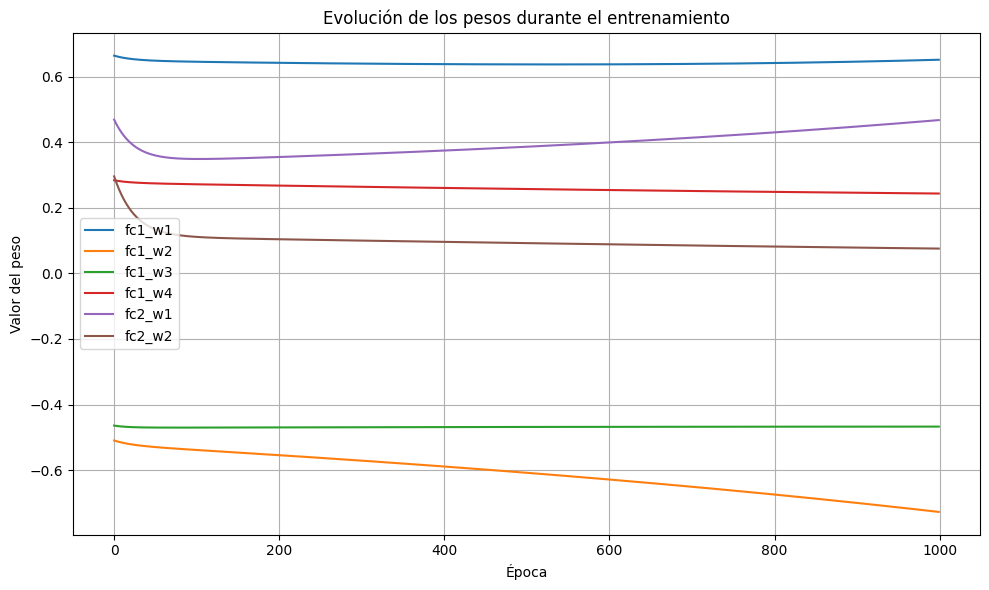

In [7]:
plt.figure(figsize=(10, 6))

for key in historial_pesos:
    plt.plot(historial_pesos[key], label=key)

plt.title("Evolución de los pesos durante el entrenamiento")
plt.xlabel("Época")
plt.ylabel("Valor del peso")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


🧠 Interpretación de la gráfica

- Cada línea representa un peso de la red.

- Al inicio, los pesos son aleatorios.

- Durante el entrenamiento, los pesos se ajustan buscando minimizar el error.

- Si convergen (se estabilizan), es una señal de que el modelo ha aprendido.

📊 ¿Qué esperar normalmente?

| Situación                                     | Comportamiento de los pesos                                     |
| --------------------------------------------- | --------------------------------------------------------------- |
| ✅ El modelo aprende correctamente             | Los pesos tienden a estabilizarse o converger                   |
| ⚠️ El modelo tiene dificultades para aprender | Algunos pesos fluctúan constantemente                           |
| ❌ El modelo no aprende (o aprende mal)        | Todos los pesos pueden quedarse estancados o fluctuar sin rumbo |


🧠 ¿Qué significa que un peso no se estabiliza?

Cuando entrenamos una red neuronal, cada peso se ajusta en cada época con el objetivo de minimizar el error (la función de pérdida). Si un peso:

- 🔄 Cambia mucho entre épocas y nunca se estabiliza (es decir, nunca se “asienta” en un valor concreto),

- ❌ Es una señal de que ese peso no está encontrando un valor útil o estable para mejorar el aprendizaje.

🔍 ¿Por qué un peso puede no estabilizarse?

Aquí tienes las causas más comunes:

1. Tasa de aprendizaje demasiado alta

    - Si el learning_rate es muy grande, los ajustes de pesos son muy bruscos.

    - Esto puede causar que los pesos salten de un lado a otro del mínimo óptimo y nunca lo alcancen.

    - 📉 Resultado: oscilación sin convergencia.

2. El peso no es útil

    - Algunas conexiones no aportan valor a la predicción (por ejemplo, cuando se inicializa una red con demasiadas neuronas o capas).

    - En este caso, el peso puede seguir cambiando porque el gradiente nunca es cero, pero no contribuye realmente.

3. Red mal configurada o datos mal preparados

    - Si la arquitectura es demasiado simple para el problema, o los datos están mal escalados, los pesos pueden no encontrar buenos valores.

    - También puede pasar si las salidas esperadas están mal codificadas o el modelo está mal inicializado.

4. Función de activación inapropiada

    - Por ejemplo, si se usa ReLU en una red pequeña como XOR, se puede “matar” neuronas si los pesos generan solo salidas negativas (ReLU = 0 para valores negativos).

    - Eso hace que el gradiente sea cero → peso no se actualiza nunca.

✅ ¿Qué hacer si ocurre esto?

| Problema                  | Solución sugerida                                |
| ------------------------- | ------------------------------------------------ |
| Pesos no convergen        | Disminuir `learning_rate`                        |
| Pesos planos o congelados | Revisar activaciones (¿ReLU?) y sesgos           |
| Pesos oscilan mucho       | Cambiar optimizador (ej. `Adam` en vez de `SGD`) |
| Modelo no aprende         | Probar con más neuronas o capas                  |


#### ‼️ Finalmente, RECUERDA:

    📢 El aprendizaje consiste en ajustar los pesos para reducir el error. Si los pesos no se estabilizan, es una alerta: el modelo no está aprendiendo eficientemente.